In [5]:
import pandas as pd

In [6]:
loan_df=pd.read_csv("loan.csv")

C:\Users\neetikaagarwal\AppData\Local\Temp\ipykernel_3972\1792103151.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df=pd.read_csv("loan.csv")


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loan_df.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [5]:
## We need to remove the columns which have NAN values or are NA so for this we need to follow few steps to find these columns and remove these


In [5]:
col=loan_df.columns
print(col)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [6]:
loan_df[col[0:10]].info()
# these values will remain as these are either loan variables or customer variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               39717 non-null  int64  
 1   member_id        39717 non-null  int64  
 2   loan_amnt        39717 non-null  int64  
 3   funded_amnt      39717 non-null  int64  
 4   funded_amnt_inv  39717 non-null  float64
 5   term             39717 non-null  object 
 6   int_rate         39717 non-null  object 
 7   installment      39717 non-null  float64
 8   grade            39717 non-null  object 
 9   sub_grade        39717 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB


In [7]:
loan_df[col[10:20]].info()
# These also look fine as of now and doesn't include unnecessary details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   emp_title            37258 non-null  object 
 1   emp_length           38642 non-null  object 
 2   home_ownership       39717 non-null  object 
 3   annual_inc           39717 non-null  float64
 4   verification_status  39717 non-null  object 
 5   issue_d              39717 non-null  object 
 6   loan_status          39717 non-null  object 
 7   pymnt_plan           39717 non-null  object 
 8   url                  39717 non-null  object 
 9   desc                 26777 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.0+ MB


In [8]:
loan_df[col[20:40]].info()
# So here are some unused variables which have same values like initial list status('f') or 0.0 in most cases as well as they are post loan variables which aren't required.
loan_df[col[20:40]].info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purpose                 39717 non-null  object 
 1   title                   39706 non-null  object 
 2   zip_code                39717 non-null  object 
 3   addr_state              39717 non-null  object 
 4   dti                     39717 non-null  float64
 5   delinq_2yrs             39717 non-null  int64  
 6   earliest_cr_line        39717 non-null  object 
 7   inq_last_6mths          39717 non-null  int64  
 8   mths_since_last_delinq  14035 non-null  float64
 9   mths_since_last_record  2786 non-null   float64
 10  open_acc                39717 non-null  int64  
 11  pub_rec                 39717 non-null  int64  
 12  revol_bal               39717 non-null  int64  
 13  revol_util              39667 non-null  object 
 14  total_acc               39717 non-null

<bound method DataFrame.info of                   purpose                      title zip_code addr_state  \
0             credit_card                   Computer    860xx         AZ   
1                     car                       bike    309xx         GA   
2          small_business       real estate business    606xx         IL   
3                   other                   personel    917xx         CA   
4                   other                   Personal    972xx         OR   
...                   ...                        ...      ...        ...   
39712    home_improvement           Home Improvement    802xx         CO   
39713         credit_card  Retiring credit card debt    274xx         NC   
39714  debt_consolidation     MBA Loan Consolidation    017xx         MA   
39715               other                   JAL Loan    208xx         MD   
39716  debt_consolidation         Consolidation Loan    027xx         MA   

         dti  delinq_2yrs earliest_cr_line  inq_last_6m

In [7]:
loan_df=loan_df.drop(columns=['delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_record','open_acc','pub_rec',
                             'revol_bal','revol_util','total_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv'])

In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                  

In [8]:
# removing all the columns for which all values are null 

loan_df = loan_df.dropna(how='all', axis=1)

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [23]:
# Now checking for other columns which have same value across all records or are applucable after loan is approved.

In [24]:
loan_df.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       36 months   10.65%       162.87     B     

In [9]:
loan_df=loan_df.drop(columns=['last_pymnt_amnt','last_pymnt_d','collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp','next_pymnt_d','last_credit_pull_d',
                             'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens'])

In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_title               37258 non-null  object 
 11  emp_length              38642 non-null  object 
 12  home_ownership          39717 non-null  object 
 13  annual_inc              39717 non-null  float64
 14  verification_status     39717 non-null

In [27]:
# Now we have only 26 columns we can check these values now to see if there are any constant type value

In [15]:
loan_df.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  loan_status  \
0       36 months   10.65%       162.87     B     

In [29]:
# We are concerned with applications which are either Fully Paid or Charged Off . Will ignore Curent applications as they are still in progress.

In [10]:
loan_df=loan_df[~(loan_df['loan_status']=='Current')]

In [11]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [18]:
loan_df['pymnt_plan'].value_counts() 
loan_df['issue_d'].value_counts() 
# removing these columns also

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [12]:
loan_df=loan_df.drop(columns=['pymnt_plan','issue_d'])

In [13]:
loan_df.head(40)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,verification_status,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,Source Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,Source Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,NaN
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,...,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,NaN


In [46]:
# Analysing how many people have defaulted the loan

In [14]:
import matplotlib.pyplot as plt

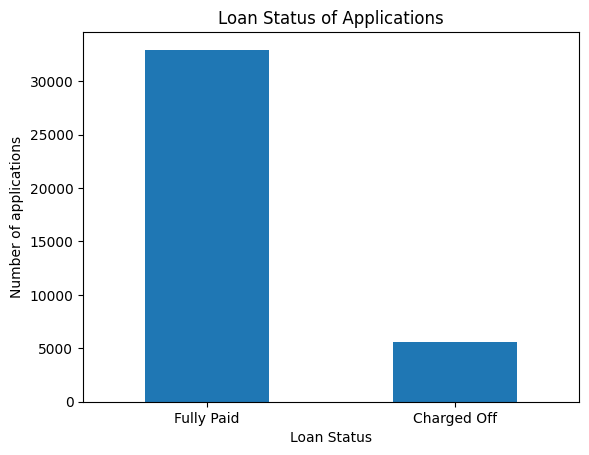

In [22]:
loan_df['loan_status'].value_counts().plot(kind='bar');
plt.xlabel("Loan Status")
plt.ylabel("Number of applications")
plt.title("Loan Status of Applications")
plt.xticks(rotation=360)
plt.show()

###This shows that almost 5000 applications are defaulted. To know the percentage we can plot pie chart.

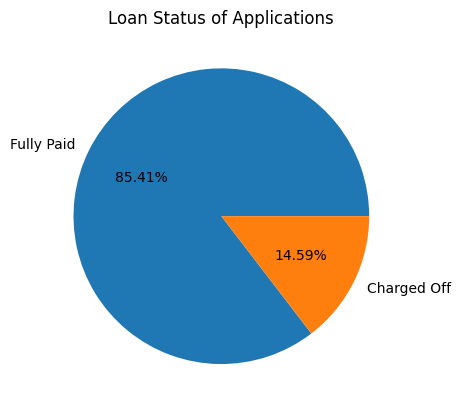

In [23]:
plt.title("Loan Status of Applications")
plt.pie(loan_df['loan_status'].value_counts(),labels=['Fully Paid','Charged Off'],autopct='%1.2f%%')
plt.show()

#### So almost 15%  applications are defaulted which we need to reduce.

In [71]:
# Now let's check a column home ownership , how this affects the loan status


In [24]:
loan_df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

                        id           
loan_status    Charged Off Fully Paid
home_ownership                       
MORTGAGE            2327.0    14694.0
NONE                   NaN        3.0
OTHER                 18.0       80.0
OWN                  443.0     2532.0
RENT                2839.0    15641.0


<AxesSubplot: xlabel='home_ownership'>

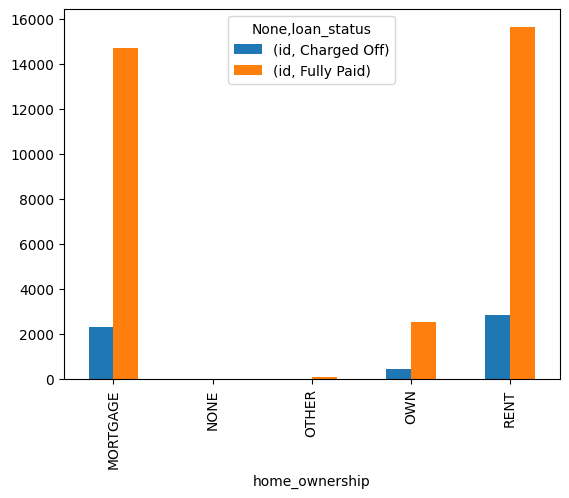

In [25]:

#df1=loan_df.pivot_table(index=['home_ownership','loan_status'],values=['id'],aggfunc='count')
df1=loan_df.pivot_table(index=['home_ownership'],columns=['loan_status'],values=['id'],aggfunc='count')
print(df1)
df1.plot(kind="bar")

## This data shows that most of the people who have defaulted the loan rent a house  and also they do have a house loan .Very less defaulters have their own house.

In [26]:
loan_df.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [27]:
df2=loan_df.pivot_table(index=['purpose'],columns=['loan_status'],values=['id'],aggfunc='count')
print(df2)

## This shows the different reasons why a loan application was submitted

                            id           
loan_status        Charged Off Fully Paid
purpose                                  
car                        160       1339
credit_card                542       4485
debt_consolidation        2767      15288
educational                 56        269
home_improvement           347       2528
house                       59        308
major_purchase             222       1928
medical                    106        575
moving                      92        484
other                      633       3232
renewable_energy            19         83
small_business             475       1279
vacation                    53        322
wedding                     96        830


<AxesSubplot: xlabel='purpose'>

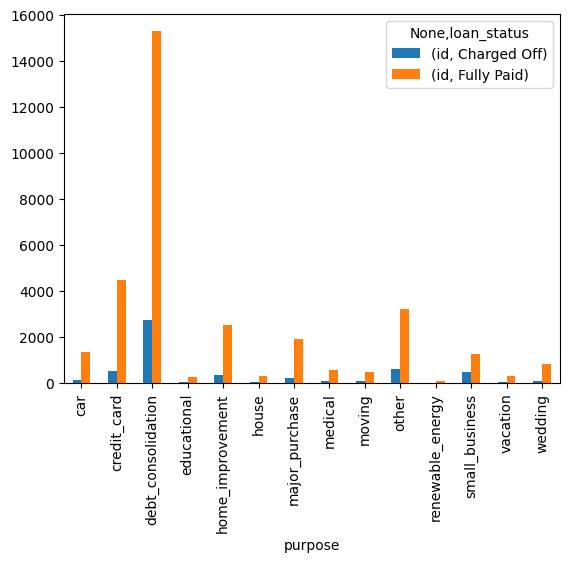

In [28]:
df2.plot(kind="bar")

In [29]:
loan_df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,verification_status,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,Source Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,Source Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,NaN
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,...,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,NaN


In [164]:
loan_df.int_rate.describe

<bound method NDFrame.describe of 0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object>

In [15]:
loan_df['int_rate']= loan_df['int_rate'].apply(lambda x : x[:-1])


In [16]:
loan_df['int_rate']=loan_df['int_rate'].astype('float32')

In [32]:
loan_df['int_rate'].describe()

count    38577.000000
mean        11.932220
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

                     id           
loan_status Charged Off Fully Paid
sub_grade                         
A1                   30       1109
A2                   74       1434
A3                  103       1707
A4                  178       2695
A5                  217       2498
B1                  171       1626
B2                  228       1773
B3                  341       2484
B4                  329       2108
B5                  356       2259
C1                  336       1719
C2                  321       1610
C3                  270       1218
C4                  212        994
C5                  208        946
D1                  167        764
D2                  271       1015
D3                  256        860
D4                  215        703
D5                  209        625
E1                  198        524
E2                  163        451
E3                  119        397
E4                  126        298
E5                  109        278
F1                  

<AxesSubplot: xlabel='sub_grade'>

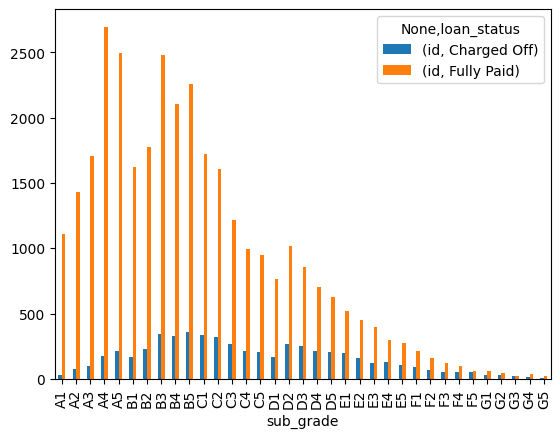

In [33]:
df_subgrade=loan_df.pivot_table(index=['sub_grade'],columns=['loan_status'],values=['id'],aggfunc='count')
print(df_subgrade)
df_subgrade.plot(kind="bar")

In [3]:
import seaborn as sns

In [18]:
loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,verification_status,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq
0,1077501,1296599,5000,5000,4975.0,36 months,10.650000,162.87,B,B2,...,Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.270000,59.83,C,C4,...,Source Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.960000,84.33,C,C5,...,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.490000,339.31,C,C1,...,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.900000,156.46,A,A4,...,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.960000,170.08,C,C5,...,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.639999,109.43,E,E1,...,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.280001,152.39,F,F2,...,Source Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.690000,121.45,B,B5,...,Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,NaN
10,1070078,1305201,6500,6500,6500.0,60 months,14.650000,153.45,C,C3,...,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,NaN


In [29]:
loan_df.int_rate.describe()
#interest rate is a univariate variable and its maean value for both Fully Paid and Charged Off is not very different

count    38577.000000
mean        11.932220
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [33]:
fully_paid=loan_df[(loan_df['loan_status']=="Fully Paid")]
charged_off=loan_df[(loan_df['loan_status']=="Charged Off")]


In [34]:
fully_paid.int_rate.describe()

count    32950.000000
mean        11.609761
std          3.599965
min          5.420000
25%          8.490000
50%         11.490000
75%         13.990000
max         24.110001
Name: int_rate, dtype: float64

In [35]:
charged_off.int_rate.describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

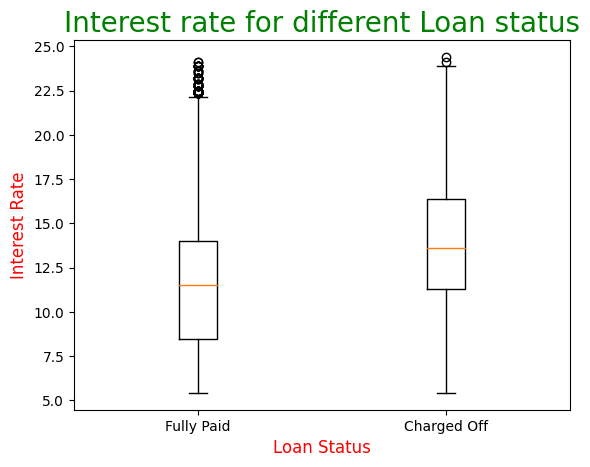

In [40]:
plt.boxplot([fully_paid.int_rate,charged_off.int_rate])
plt.title("Interest rate for different Loan status", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("Loan Status",fontdict={'fontsize':12,'fontweight':5,'color':'Red'})
plt.ylabel("Interest Rate",fontdict={'fontsize':12,'fontweight':5,'color':'Red'})
plt.xticks((1,2),['Fully Paid','Charged Off'])
plt.show()

# It shows the interest rate as the univariate analysis

In [41]:
loan_df.corr()

# This shows a correlation matrix between different variables. As we can see there is a negative correlation between customer's annual income and dti or mths_since_last_delinq.

C:\Users\neetikaagarwal\AppData\Local\Temp\ipykernel_3972\804777513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_df.corr()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,mths_since_last_delinq
id,1.000000,0.993534,0.120614,0.131283,0.231603,0.053936,0.076088,0.005572,0.091785,0.119468
member_id,0.993534,1.000000,0.120393,0.130307,0.241324,0.050808,0.070918,0.006442,0.092910,0.125311
loan_amnt,0.120614,0.120393,1.000000,0.981790,0.937922,0.301265,0.932260,0.268999,0.062436,0.015440
funded_amnt,0.131283,0.130307,0.981790,1.000000,0.956172,0.304930,0.958035,0.264798,0.062194,0.015969
funded_amnt_inv,0.231603,0.241324,0.937922,0.956172,1.000000,0.297473,0.905464,0.251981,0.070663,0.073367
int_rate,0.053936,0.050808,0.301265,0.304930,0.297473,1.000000,0.277203,0.048899,0.110913,-0.054307
installment,0.076088,0.070918,0.932260,0.958035,0.905464,0.277203,1.000000,0.267842,0.052038,0.000268
annual_inc,0.005572,0.006442,0.268999,0.264798,0.251981,0.048899,0.267842,1.000000,-0.121530,-0.007442
dti,0.091785,0.092910,0.062436,0.062194,0.070663,0.110913,0.052038,-0.121530,1.000000,0.068705
mths_since_last_delinq,0.119468,0.125311,0.015440,0.015969,0.073367,-0.054307,0.000268,-0.007442,0.068705,1.000000


loan_status   Charged Off    Fully Paid
annual_inc   62427.298034  69862.503328


<AxesSubplot: >

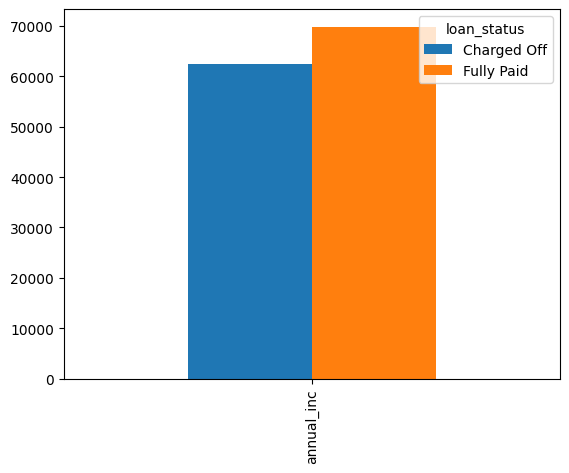

In [45]:
df_annualIncome=loan_df.pivot_table(columns=['loan_status'],values=['annual_inc'],aggfunc='mean')
print(df_annualIncome)
df_annualIncome.plot(kind="bar")

In [57]:
v1=loan_df.columns
df=loan_df[v1[10:20]]
df.head(30)



,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,url,desc,purpose,title
0,NaN,10+ years,RENT,24000.00,Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer
1,Ryder,< 1 year,RENT,30000.00,Source Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike
2,NaN,10+ years,RENT,12252.00,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business
3,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel
5,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back
6,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan
7,MKC Accounting,9 years,RENT,48000.00,Source Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment
8,NaN,4 years,OWN,40000.00,Source Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio
9,Starbucks,< 1 year,RENT,15000.00,Verified,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.
10,Southwest Rural metro,5 years,OWN,72000.00,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation


                             id           
loan_status         Charged Off Fully Paid
verification_status                       
Not Verified               2142      14552
Source Verified            1434       8243
Verified                   2051      10155


<AxesSubplot: xlabel='verification_status'>

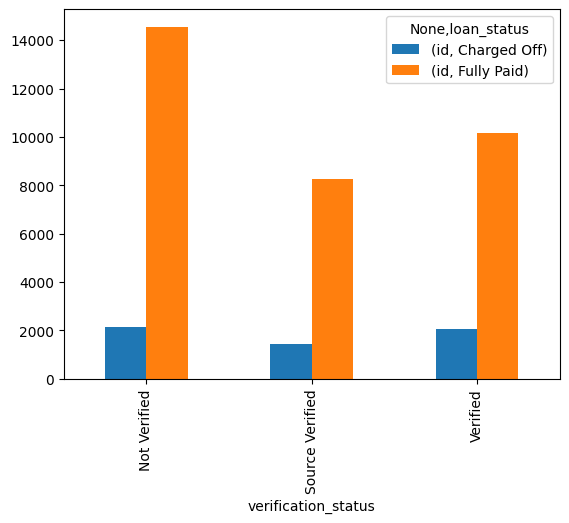

In [51]:
df_statusVS=loan_df.pivot_table(index=['verification_status'],columns=['loan_status'],values=['id'],aggfunc='count')
print(df_statusVS)
df_statusVS.plot(kind="bar")


# This is also an example of bivariate analysis but for categorical variables. But here if we look at the data it doesn't help in identifying risky applications 
#As the Charged off applications are almost same for both Verified and Not verified ones.